# Titanic Survival Classification

In [1]:
#importing dependencies

import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data collection & Processing

In [2]:
#loading data from csv to pandas df

titanic_dataset = pd.read_csv('C:\\Users\\prati\\OneDrive\\Desktop\\.vscode\\Bharat Intern DS\\Titanic Dset.csv')

titanic_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.shape

(891, 12)

In [4]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# null value check

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#drop cabin coloumn from the dataframe as most values are missing in it

titanic_data = titanic_dataset.drop(columns = 'Cabin', axis =1)

In [7]:
#filling missing values in age columns with mean of age

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)



#inplace = true makes changes to the original data

In [8]:
#filling missing values in Embarked columns with mode of it

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [9]:
# rechecking null value 

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [10]:
#finding no. of people survived/ not survived

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# plot

sns.set()

<Axes: xlabel='Survived', ylabel='count'>

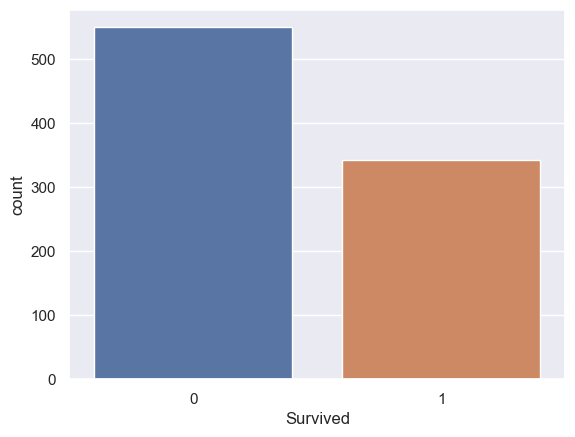

In [12]:
sns.countplot(x='Survived', data=titanic_data)


<Axes: xlabel='Sex', ylabel='count'>

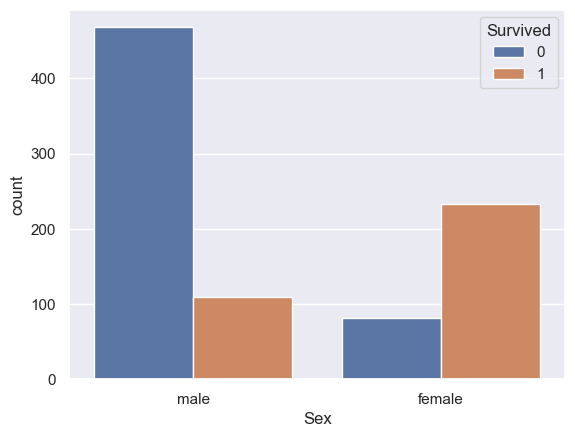

In [13]:
# Survival by considering Gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)


<Axes: xlabel='Pclass', ylabel='count'>

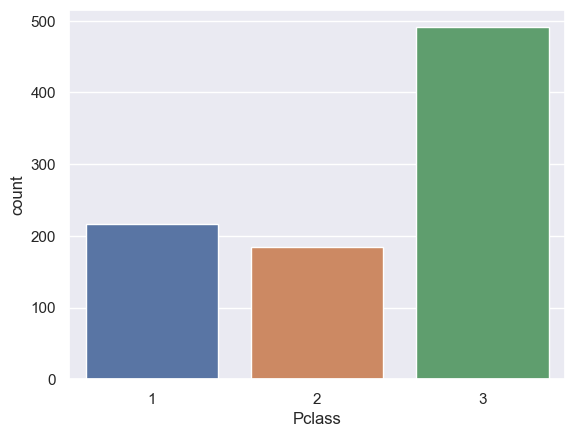

In [14]:
#plot  by considering 'Pclass' i.e. ticket-class
sns.countplot(x='Pclass', data=titanic_data)


<Axes: xlabel='Pclass', ylabel='count'>

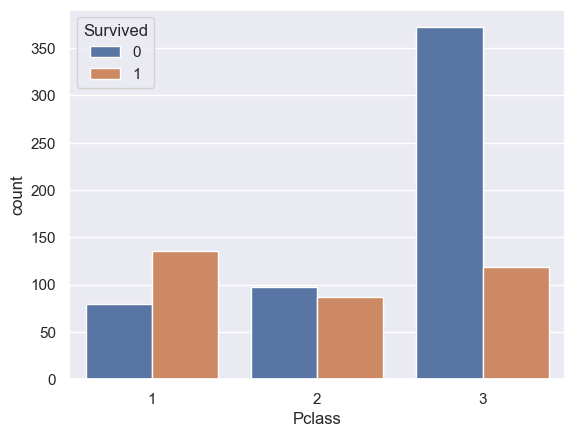

In [15]:
# Survival by considering tickeet class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)


# Encoding categorical columns

In [16]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# replacing male as 0 and females as 1

titanic_data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)


In [19]:
titanic_data.replace({'Embarked': {'S': 0, 'C': 1, 'Q':2}}, inplace=True)


In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Seperating Features  & target

In [21]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis =1)

Y = titanic_data['Survived']

In [22]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Train & test data split

In [23]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


# Model Training

# Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, Y_train)

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation - Accuracy Score

In [27]:
# Accuracy of training data

X_train_prediction = model.predict(X_train)


In [28]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [29]:
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)

print("The accuracy of training data:-", training_data_accuracy)

The accuracy of training data:- 0.8075842696629213


In [30]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)


In [31]:
test_data_accuracy =accuracy_score(Y_test, X_test_prediction)

print("The accuracy of test data:-", test_data_accuracy)

The accuracy of test data:- 0.7821229050279329


In [32]:

print("The accuracy of training data:-",training_data_accuracy)
print("The accuracy of test data:-",test_data_accuracy)

The accuracy of training data:- 0.8075842696629213
The accuracy of test data:- 0.7821229050279329


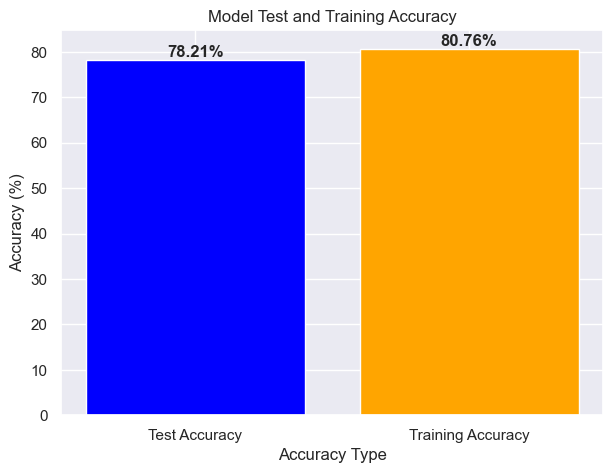

In [33]:
import matplotlib.pyplot as plt


test_accuracy = test_data_accuracy * 100
train_accuracy = training_data_accuracy * 100

plt.figure(figsize=(7, 5))  
plt.bar(['Test Accuracy', 'Training Accuracy'], [test_accuracy, train_accuracy], color=['blue', 'orange'])


plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy (%)')
plt.title('Model Test and Training Accuracy')

for i, v in enumerate([test_accuracy, train_accuracy]):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

# plot
plt.show()
